In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv("train_v9rqX0R.csv")
test_data=pd.read_csv("test_AbJTz2l.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [4]:
print(train_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
for dataset in [train_data,test_data]:
    duplicates = dataset[dataset.duplicated()]
    num_duplicates = duplicates.shape[0]
    print(num_duplicates)

0
0


### Checking for Null values and removing them

In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
### median imputation of "Item_Weight" Column

In [12]:
for dataset in [train_data, test_data]:
    dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].median())
train_null_count = train_data['Item_Weight'].isnull().sum()
test_null_count = test_data['Item_Weight'].isnull().sum()
print(train_null_count,test_null_count)

0 0


In [13]:
outlet_columns = [col for col in train_data.columns if 'Outlet' in col]
outlet_data = train_data[outlet_columns]
outlet_data.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
outlet_size_missing = outlet_data[train_data['Outlet_Size'].isnull()]
outlet_size_missing.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [15]:
#imputation using multiple regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
for data in [train_data, test_data]:
    data_missing_size = data[data['Outlet_Size'].isnull()]
    data_non_missing_size = data[data['Outlet_Size'].notnull()]
    features = ['Outlet_Location_Type', 'Outlet_Type']
    encoded_non_missing = pd.get_dummies(data_non_missing_size[features], drop_first=True)
    encoded_missing = pd.get_dummies(data_missing_size[features], drop_first=True)
    encoded_non_missing, encoded_missing = encoded_non_missing.align(encoded_missing, join='left', axis=1, fill_value=0)
    y = data_non_missing_size['Outlet_Size']
    X_train, X_test, y_train, y_test = train_test_split(encoded_non_missing, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train) 
    predicted_sizes = rf_model.predict(encoded_missing)
    data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = predicted_sizes

In [18]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outlier Detection and Removal

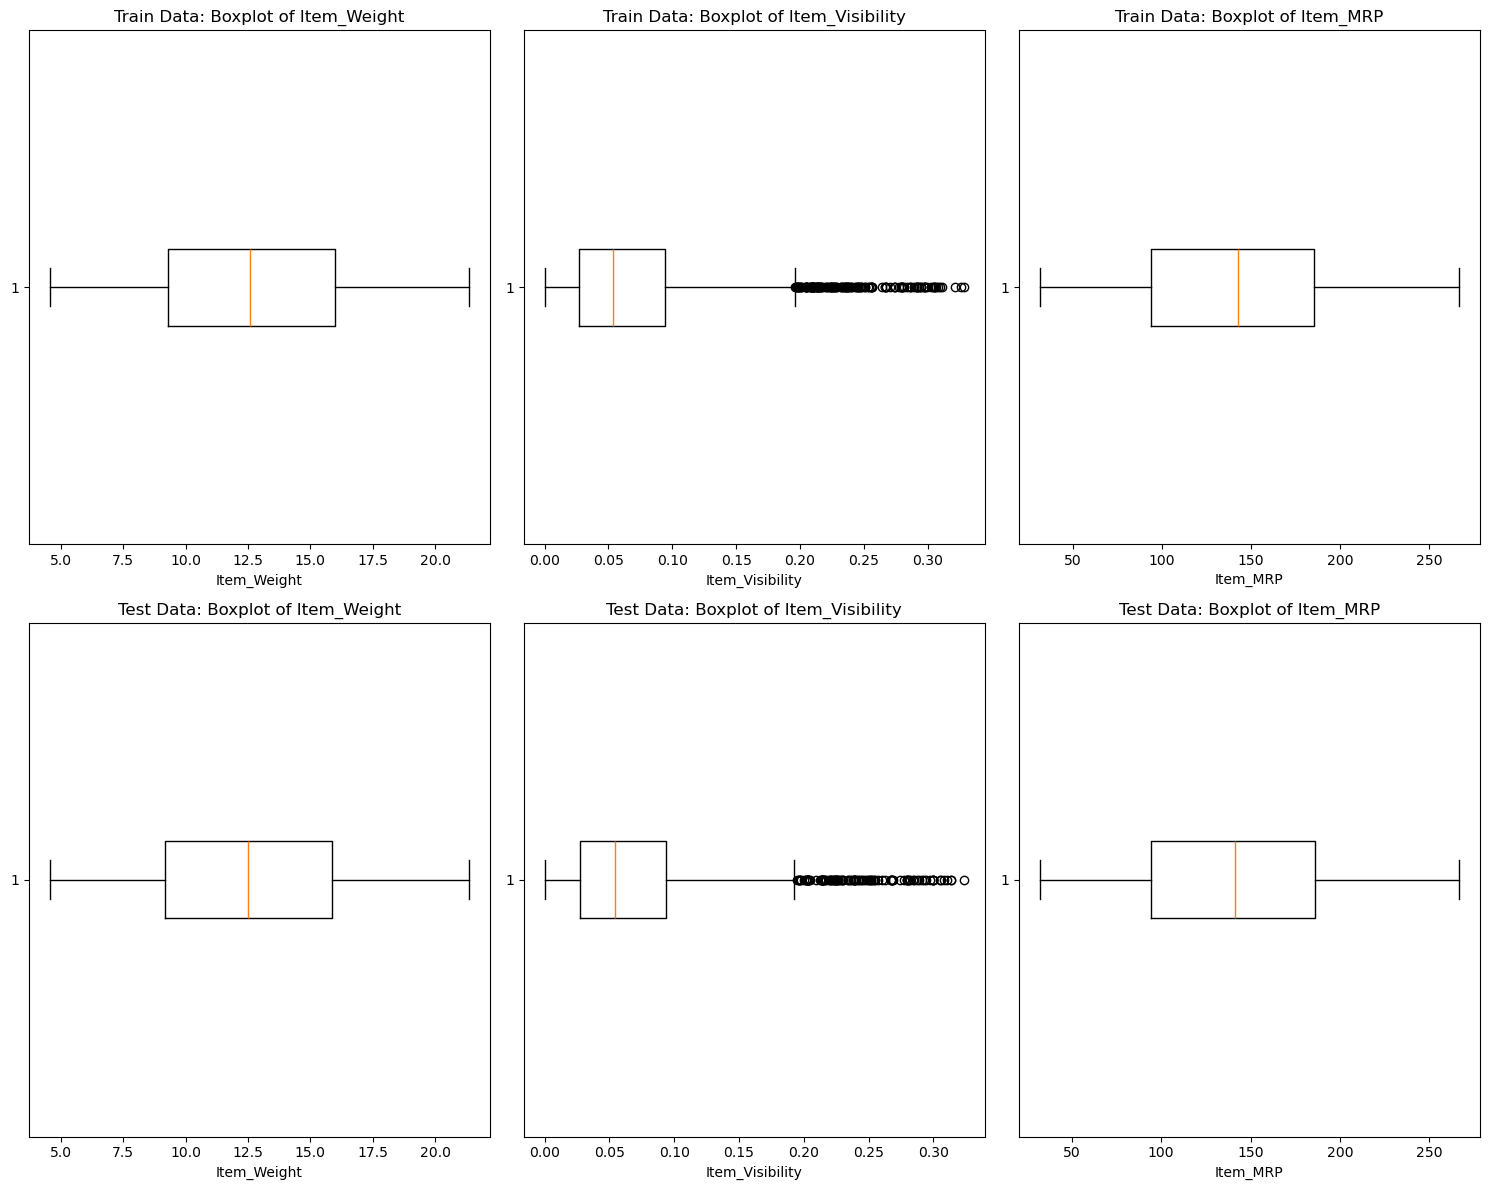

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
columns_to_plot = ['Item_Weight','Item_Visibility','Item_MRP']
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(train_data[column].dropna(), vert=False)
    plt.title(f"Train Data: Boxplot of {column}")
    plt.xlabel(column)
for i, column in enumerate(columns_to_plot, 4):
    plt.subplot(2, 3, i)
    plt.boxplot(test_data[column].dropna(), vert=False)
    plt.title(f"Test Data: Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [21]:
for df in [train_data, test_data]:
    Q1 = df['Item_Visibility'].quantile(0.25)
    Q3 = df['Item_Visibility'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]
    print(len(outliers))  

144
113


In [1]:
### outlier removal

In [22]:
Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_data['Item_Visibility'] = train_data['Item_Visibility'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

In [23]:
Q1 = test_data['Item_Visibility'].quantile(0.25)
Q3 = test_data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_data['Item_Visibility'] = test_data['Item_Visibility'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

In [ ]:
### again checking for outliers

In [24]:
for df in [train_data, test_data]:
    Q1 = df['Item_Visibility'].quantile(0.25)
    Q3 = df['Item_Visibility'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]
    print(len(outliers))  

0
0


### Data transformation

minimum value in 'Item_Visibility' is 0, which makes no practical sense. So consider it like missing information and impute it with mean visibility of that product

In [25]:
for df in [train_data, test_data]:
    median_visibility = df['Item_Visibility'].median()
    df['Item_Visibility'] = df['Item_Visibility'].replace(0, median_visibility)

In [26]:
for col in train_data.select_dtypes(include='object').columns:
    if col != 'Item_Identifier':  
        print(f"Value counts for column {col}:")
        print(train_data[col].value_counts())
        print("-" * 50)

Value counts for column Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
--------------------------------------------------
Value counts for column Outlet_Identifier:
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010   

In [27]:
for dataset in [train_data,test_data]:
    dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({
        'Low Fat': 'low_fat',
        'LF': 'low_fat',
        'low fat': 'low_fat',
        'Regular': 'regular',
        'reg': 'regular'
    })

In [28]:
train_value_counts = train_data['Item_Fat_Content'].value_counts()
train_value_counts

Item_Fat_Content
low_fat    5517
regular    3006
Name: count, dtype: int64

In [29]:
train_data.shape

(8523, 12)

In [30]:
test_data.shape

(5681, 11)

In [31]:
train_data.to_csv('train_data_cleaned.csv',index=False)
test_data.to_csv('test_data_cleaned.csv',index=False)